In [55]:
import json
import os
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import base64
import io

In [56]:
DATASET_PATH = "../Dataset"
ANNOTATION_PATH = "../Dataset/annotation.json"

with open(ANNOTATION_PATH, 'r') as f:
    df = json.load(f)

print(len(df))
print(os.listdir(DATASET_PATH))

275
['annotation.json', '.DS_Store', 'output_dataset.xlsx', 'UrbanFlowComplexity', 'SafetyCompliance', 'PerceptionReasoning']


In [57]:
'''OR1.png': {'path': 'SafetyCompliance/ObstacleRecognition/OR1.png',
  'category': 'SafetyCompliance/ObstacleRecognition',
  'question': 'The autonomous vehicle is approaching a closed gate. What is the correct course of action?',
  'answers': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.',
  'distractor1': 'Drive directly up to the gate to make it open faster.',
  'distractor2': 'Assume the gate is for exit only and look for another entrance.',
  'distractor3': 'Attempt to tailgate another car through the gate.'},'''

"OR1.png': {'path': 'SafetyCompliance/ObstacleRecognition/OR1.png',\n  'category': 'SafetyCompliance/ObstacleRecognition',\n  'question': 'The autonomous vehicle is approaching a closed gate. What is the correct course of action?',\n  'answers': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.',\n  'distractor1': 'Drive directly up to the gate to make it open faster.',\n  'distractor2': 'Assume the gate is for exit only and look for another entrance.',\n  'distractor3': 'Attempt to tailgate another car through the gate.'},"

In [58]:
id_list = []
image_path_list = []
question_list = []
explanation_list = []
answer_list = []

for data in df:
    id_list.append(data.split(".")[0])
    image_path_list.append(os.path.join(DATASET_PATH, df[data]['path']))
    question_list.append(df[data]['question'])
    explanation_list.append(df[data]['answers'])
    answer_list.append({
        'A': df[data]['answers'],
        'B': df[data]['distractor1'],
        'C': df[data]['distractor2'],
        'D': df[data]['distractor3'],
        })
    break

print(id_list[0])
print(image_path_list[0])
print(question_list[0])
print(explanation_list[0])
print(answer_list[0])

OR1
../Dataset/SafetyCompliance/ObstacleRecognition/OR1.png
The autonomous vehicle is approaching a closed gate. What is the correct course of action?
Approach the gate, stop at a safe distance, and wait for it to open before proceeding.
{'A': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.', 'B': 'Drive directly up to the gate to make it open faster.', 'C': 'Assume the gate is for exit only and look for another entrance.', 'D': 'Attempt to tailgate another car through the gate.'}


In [59]:
df_columns=['id','image', 'question', 'A', 'B', 'C', 'D', 'answer', 'explanation']
option_labels = ['A', 'B', 'C', 'D']
pd.DataFrame(columns=df_columns)

,id,image,question,A,B,C,D,answer,explanation


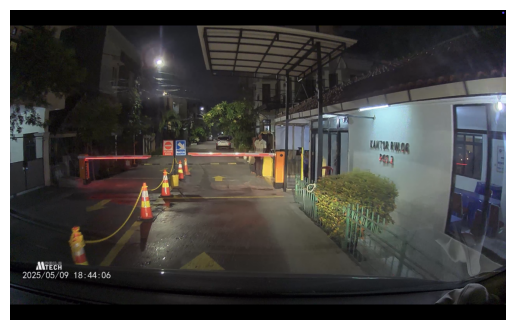

In [60]:
def encode_base64(im_path):
    # Determine the image format (optional but good practice)
    # You can hardcode this if you know the format, e.g., format="PNG"
    img_format = im_path.split('.')[-1].upper()
    if img_format == 'JPG':
        img_format = 'JPEG'

    try:
        # 1. Open the image
        image = Image.open(im_path)

        # 2. Create a byte buffer
        buffered = io.BytesIO()

        # 3. Save the image to the buffer in its original format
        image.save(buffered, format=img_format)

        # 4. Get the byte value and encode it
        img_byte = buffered.getvalue()
        base64_encoded_string = base64.b64encode(img_byte)

        # 5. Decode the bytes to a UTF-8 string
        base64_string = base64_encoded_string.decode('utf-8')

        return base64_string

    except FileNotFoundError:
        print(f"Error: The file at {im_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

im = encode_base64(image_path_list[0])
try:
    # 1. Decode the Base64 string into bytes
    image_bytes = base64.b64decode(im)

    # 2. Use io.BytesIO to read the bytes as a file
    image_buffer = io.BytesIO(image_bytes)

    # 3. Open the image with Pillow and display with Matplotlib
    image = Image.open(image_buffer)
    
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [61]:
processed_data = []

# Iterate over each item in your original data
for data_key, values in df.items():
    # 1. Store the original correct answer text
    correct_answer_text = values['answers']

    # 2. Collect all options into a list
    all_options = [
        values['answers'],
        values['distractor1'],
        values['distractor2'],
        values['distractor3']
    ]

    # 3. Shuffle the options randomly
    random.shuffle(all_options)

    # 4. Find the new position (0, 1, 2, or 3) of the correct answer
    correct_option_index = all_options.index(correct_answer_text)

    # 5. Get the corresponding label ('A', 'B', 'C', or 'D') for the correct answer
    correct_option_label = option_labels[correct_option_index]

    # 6. Build a dictionary for the current row
    row_data = {
        'id': data_key.split('.')[0],
        'image': encode_base64(os.path.join(DATASET_PATH, values['path'])),
        'question': values['question'],
        'A': all_options[0],
        'B': all_options[1],
        'C': all_options[2],
        'D': all_options[3],
        'answer': correct_option_label, # The randomized label ('A', 'B', 'C', or 'D')
        'explanation': correct_answer_text # The original, unchanging answer text
    }
    processed_data.append(row_data)

# Create the DataFrame from the list of processed row data
final_df = pd.DataFrame(processed_data, columns=df_columns)

# Save the DataFrame to an Excel file, without the pandas index
output_filename = '../Dataset/annotation.xlsx'
final_df.to_excel(output_filename, index=False)

print(f"Successfully created '{output_filename}'")
print("\nFirst 5 rows of the new DataFrame:")
final_df.head()


Successfully created '../Dataset/annotation.xlsx'

First 5 rows of the new DataFrame:


,id,image,question,A,B,C,D,answer,explanation
0,OR1,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The autonomous vehicle is approaching a closed...,Attempt to tailgate another car through the gate.,Drive directly up to the gate to make it open ...,Assume the gate is for exit only and look for ...,"Approach the gate, stop at a safe distance, an...",D,"Approach the gate, stop at a safe distance, an..."
1,OR10,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,An obstacle is partially blocking the vehicle'...,Steer slightly to the right to safely maneuver...,Come to a complete stop and wait for the obsta...,Accelerate to get past the obstacle as quickly...,"Maintain course and speed, assuming the obstac...",A,Steer slightly to the right to safely maneuver...
2,OR11,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"As a responsible driver, how should you naviga...",Try to squeeze between the obstacle and the la...,Move into the right lane without signaling to ...,Honk the horn to make the obstacle move out of...,"When the right lane is clear, signal and steer...",D,"When the right lane is clear, signal and steer..."
3,OR12,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The autonomous vehicle is exiting a building. ...,"Activate the turn signal, wait for the gate to...",Proceed as soon as the gate starts opening to ...,Accelerate quickly out of the gate to merge in...,Exit without a turn signal as it's the only path.,A,"Activate the turn signal, wait for the gate to..."
4,OR13,iVBORw0KGgoAAAANSUhEUgAABusAAANwCAYAAAAm9leLAA...,The road ahead is narrow due to parked vehicle...,Wait for a sufficient gap in oncoming traffic ...,Accelerate to pass through the narrow gap befo...,Proceed slowly and expect oncoming traffic to ...,Turn on hazard lights and stop until the parke...,A,Wait for a sufficient gap in oncoming traffic ...


In [62]:
final_df.isna().sum()

id             0
image          0
question       0
A              0
B              0
C              0
D              0
answer         0
explanation    0
dtype: int64

In [63]:
pd.read_excel(output_filename)

,id,image,question,A,B,C,D,answer,explanation
0,OR1,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The autonomous vehicle is approaching a closed...,Attempt to tailgate another car through the gate.,Drive directly up to the gate to make it open ...,Assume the gate is for exit only and look for ...,"Approach the gate, stop at a safe distance, an...",D,"Approach the gate, stop at a safe distance, an..."
1,OR10,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,An obstacle is partially blocking the vehicle'...,Steer slightly to the right to safely maneuver...,Come to a complete stop and wait for the obsta...,Accelerate to get past the obstacle as quickly...,"Maintain course and speed, assuming the obstac...",A,Steer slightly to the right to safely maneuver...
2,OR11,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"As a responsible driver, how should you naviga...",Try to squeeze between the obstacle and the la...,Move into the right lane without signaling to ...,Honk the horn to make the obstacle move out of...,"When the right lane is clear, signal and steer...",D,"When the right lane is clear, signal and steer..."
3,OR12,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The autonomous vehicle is exiting a building. ...,"Activate the turn signal, wait for the gate to...",Proceed as soon as the gate starts opening to ...,Accelerate quickly out of the gate to merge in...,Exit without a turn signal as it's the only path.,A,"Activate the turn signal, wait for the gate to..."
4,OR13,iVBORw0KGgoAAAANSUhEUgAABusAAANwCAYAAAAm9leLAA...,The road ahead is narrow due to parked vehicle...,Wait for a sufficient gap in oncoming traffic ...,Accelerate to pass through the narrow gap befo...,Proceed slowly and expect oncoming traffic to ...,Turn on hazard lights and stop until the parke...,A,Wait for a sufficient gap in oncoming traffic ...
...,...,...,...,...,...,...,...,...,...
270,VRUCI22,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The agent is intending to enter the street and...,The parked vehicles on the side of the road.,The smoothness of the turn.,The child who might run into the street.,The oncoming traffic from the right.,C,The child who might run into the street.
271,VRUCI23,iVBORw0KGgoAAAANSUhEUgAAB38AAAP3CAYAAAAsjYS4AA...,The agent is currently at a complete stop. Wha...,The agent should proceed as soon as the immedi...,The agent should inch forward to signal its in...,The agent needs to make sure the path is compl...,The agent should wait for a signal from other ...,C,The agent needs to make sure the path is compl...
272,VRUCI24,iVBORw0KGgoAAAANSUhEUgAAB38AAAPyCAYAAAB8QBULAA...,The agent is currently moving at a slowly stea...,Come to a complete stop and wait for all pedes...,Honk to make the pedestrians move faster.,Keep moving forward at a reduced speed with re...,Accelerate to avoid being delayed by pedestrians.,C,Keep moving forward at a reduced speed with re...
273,VRUCI25,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"The agent is intending to go to the left, but ...",They are likely to remain on the street to con...,They are waiting for a gap in traffic to cross...,They will leave the road as soon as the agent ...,They will quickly move to the sidewalk once th...,A,They are likely to remain on the street to con...
